<a href="https://colab.research.google.com/github/AhmUmarCMS/AhmuCMS/blob/main/DiabetesPrediction_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Relabelling Original Dataset**

In [118]:
from scipy import stats
import pandas as pd
import numpy as np

In [119]:
#read diabetes data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
data.shape

(768, 9)

In [121]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [122]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [124]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [126]:
#Data Labelling

#This is done to elimiate the inconsistencies in the original data. For example, a person is said to have diabetes but the glucose value is 0
#Define a new column 'Output' for reassining label to data based on medical standard. Glucose >125 is known as diabetes,
#Glucose 125 to 99 is prediabetes, while Glucose 99 <70 is for normal patients
# for all zero classes, do:
data['Output'] = data['Glucose'].apply(lambda x: 'diabetes' if x > 125 else 'prediabetes' if x > 99 and x <= 125 else 'normal' if x > 70 else 'diabetes')
data.head()

"""
Another way to implement this is with the following code:

# Define a custom function to assign labels based on glucose values
def assign_label(glucose_value):
    if glucose_value > 125:
        return 'diabetes'
    elif 99 < glucose_value <= 125:
        return 'prediabetes'
    elif 70 < glucose_value <= 99:
        return 'normal'
    else:
        return 'diabetes'  # Consider values <= 70 as diabetes (as mentioned in the original code)

# Apply the custom function to the 'Glucose' column and create a new column 'Output'
data['Output'] = data['Glucose'].apply(assign_label)

# Display the updated DataFrame
data.head()

"""

"\nAnother way to implement this is with the following code:\n\n# Define a custom function to assign labels based on glucose values\ndef assign_label(glucose_value):\n    if glucose_value > 125:\n        return 'diabetes'\n    elif 99 < glucose_value <= 125:\n        return 'prediabetes'\n    elif 70 < glucose_value <= 99:\n        return 'normal'\n    else:\n        return 'diabetes'  # Consider values <= 70 as diabetes (as mentioned in the original code)\n\n# Apply the custom function to the 'Glucose' column and create a new column 'Output'\ndata['Output'] = data['Glucose'].apply(assign_label)\n\n# Display the updated DataFrame\ndata.head()\n\n"

In [127]:
#Label Encoding performed on new 'Output' column

data['Output'] = data['Output'].replace(['normal','prediabetes', 'diabetes'],[0,1,2])
#Delete original label
data= data.drop(['Outcome'], axis=1)
data = data.rename({'Output': 'Outcome'}, axis=1)
#save data
data.to_csv('diabetes2.csv',index=False, header=True)

In [128]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,2


##**Feature Selection**

In [129]:
#Checking 0 entry values across different data dimensions before removing

total_zero_glucose = (data['Glucose'] == 0).sum()
total_zero_BP = (data['BloodPressure'] == 0).sum()
total_zero_ST = (data['SkinThickness'] == 0).sum()
total_zero_Insulin = (data['Insulin'] == 0).sum()
total_zero_DPF = (data['DiabetesPedigreeFunction'] == 0).sum()
total_zero_Age = (data['Age'] == 0).sum()

# Display the total number of zero values in the 'Glucose' column
print("Total number of zero values in the 'Glucose' column:", total_zero_glucose)
print("Total number of zero values in the 'BloodPressure' column:", total_zero_BP)
print("Total number of zero values in the 'SkinThickness' column:", total_zero_ST)
print("Total number of zero values in the 'Insulin' column:", total_zero_Insulin)
print("Total number of zero values in the 'DiabetesPedigreeFunction' column:", total_zero_DPF)
print("Total number of zero values in the 'Age' column:", total_zero_Age)

Total number of zero values in the 'Glucose' column: 5
Total number of zero values in the 'BloodPressure' column: 35
Total number of zero values in the 'SkinThickness' column: 227
Total number of zero values in the 'Insulin' column: 374
Total number of zero values in the 'DiabetesPedigreeFunction' column: 0
Total number of zero values in the 'Age' column: 0


In [130]:
#delete zero row entries (using this to avoid )
data= data[data['Glucose'] != 0]
data= data[data['BloodPressure'] != 0]
data= data[data['SkinThickness'] != 0]
data= data[data['Insulin'] != 0]
data= data[data['DiabetesPedigreeFunction'] != 0]
data= data[data['Age'] != 0]

#reset index
data.reset_index(drop=True, inplace=True)

#save non-zero entry data as
data.to_csv('diabetesNonzero.csv', index=False)

In [131]:
#Checking 0 entry values across different data dimensions after removing

total_zero_glucose = (data['Glucose'] == 0).sum()
total_zero_BP = (data['BloodPressure'] == 0).sum()
total_zero_ST = (data['SkinThickness'] == 0).sum()
total_zero_Insulin = (data['Insulin'] == 0).sum()
total_zero_DPF = (data['DiabetesPedigreeFunction'] == 0).sum()
total_zero_Age = (data['Age'] == 0).sum()

# Display the total number of zero values in the 'Glucose' column
print("Total number of zero values in the 'Glucose' column:", total_zero_glucose)
print("Total number of zero values in the 'BloodPressure' column:", total_zero_BP)
print("Total number of zero values in the 'SkinThickness' column:", total_zero_ST)
print("Total number of zero values in the 'Insulin' column:", total_zero_Insulin)
print("Total number of zero values in the 'DiabetesPedigreeFunction' column:", total_zero_DPF)
print("Total number of zero values in the 'Age' column:", total_zero_Age)

Total number of zero values in the 'Glucose' column: 0
Total number of zero values in the 'BloodPressure' column: 0
Total number of zero values in the 'SkinThickness' column: 0
Total number of zero values in the 'Insulin' column: 0
Total number of zero values in the 'DiabetesPedigreeFunction' column: 0
Total number of zero values in the 'Age' column: 0


In [132]:
data = pd.read_csv('diabetesNonzero.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,2
2,3,78,50,32,88,31.0,0.248,26,0
3,2,197,70,45,543,30.5,0.158,53,2
4,1,189,60,23,846,30.1,0.398,59,2


In [133]:
#This line calculates the Spearman correlation coefficients (rho) and corresponding p-values (pval)
#for the dataset data using the spearmanr function from the scipy.stats module.

rho, pval  = stats.spearmanr(data)

In [134]:
colno = len(data.columns)
print(colno)

9


In [135]:
"""
These lines create two DataFrames, df1 and df2, from the reshaped arrays of Spearman correlation
coefficients (rho) and p-values (pval). The reshape(-1, 9) operation reshapes the arrays to have 9 columns
(as specified by the number 9), and the original number of rows is inferred.
The column names of the DataFrames are set to the column names of the original data.
"""

df1 = pd.DataFrame(rho.reshape(-1, 9), columns=data.columns)
df2 = pd.DataFrame(pval.reshape(-1,9), columns=data.columns)
print (df2)

    Pregnancies        Glucose  BloodPressure  SkinThickness       Insulin  \
0  0.000000e+00   1.512343e-04   2.135696e-03   2.583580e-01  1.305371e-02   
1  1.512343e-04   0.000000e+00   2.077935e-06   1.577603e-05  2.855935e-50   
2  2.135696e-03   2.077935e-06   0.000000e+00   4.566778e-07  8.497382e-03   
3  2.583580e-01   1.577603e-05   4.566778e-07   0.000000e+00  1.177107e-06   
4  1.305371e-02   2.855935e-50   8.497382e-03   1.177107e-06  0.000000e+00   
5  2.447151e-01   7.373107e-05   9.317736e-11   1.731825e-53  9.140212e-10   
6  9.195581e-01   7.794421e-02   6.357441e-01   7.549431e-02  1.108721e-02   
7  7.146666e-46   1.000879e-12   1.659000e-11   1.023119e-06  1.287731e-07   
8  1.988624e-04  8.695074e-141   2.185037e-07   2.995704e-05  1.074357e-38   

            BMI  DiabetesPedigreeFunction           Age        Outcome  
0  2.447151e-01                  0.919558  7.146666e-46   1.988624e-04  
1  7.373107e-05                  0.077944  1.000879e-12  8.695074e-141  


In [136]:
### we can assign the index back to the column names for the total matrix:
df2=df2.set_index(data.columns)    #pvalue
#df1=df1.set_index(data1.columns)

In [137]:
"""
These lines iterate over the rows of df2 and check if the p-value in the last column (index 8)
is less than or equal to the significance level (alpha, here set to 0.01).
If the condition is met, the p-value and corresponding index are appended to the lists pv and ind.
"""

import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])*10000
    alpha = 0.01
    if m <= alpha:
        pv.append(m)
        ind.append(index)
        print(pv,ind)
pv = pv[:-1]
ind = ind[:-1]

[8.695073891778219e-137] ['Glucose']
[8.695073891778219e-137, 0.0021850372598786923] ['Glucose', 'BloodPressure']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34] ['Glucose', 'BloodPressure', 'Insulin']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']
[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06, 0.0] ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Outcome']


In [138]:
# Selected Features
print(pv,ind)

[8.695073891778219e-137, 0.0021850372598786923, 1.0743570349726535e-34, 2.750307561581837e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']


##**Visualization**

In [139]:
"""

This code snippet processes the p-values obtained from the Spearman correlation test to transform them
and store them in a list.

"""

import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])
    pv.append(abs(np.log(m)))
    ind.append(index)
pv = pv[:-1]
ind = ind[:-1]
pv = [math.floor(float(x)) for x in pv]

<ipython-input-139-a5c59f50cf7d>:13: RuntimeWarning: divide by zero encountered in log
  pv.append(abs(np.log(m)))


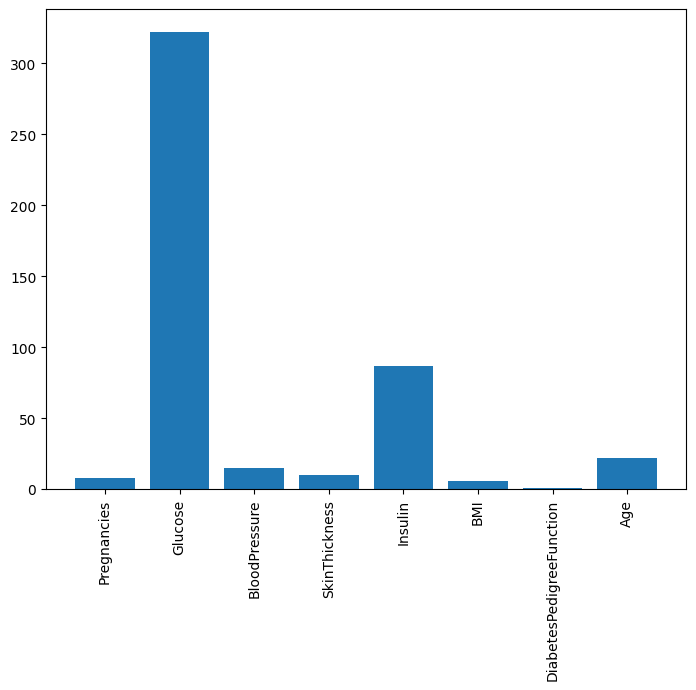

In [140]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,pv)
plt.xticks(ind, rotation=90)
plt.show()

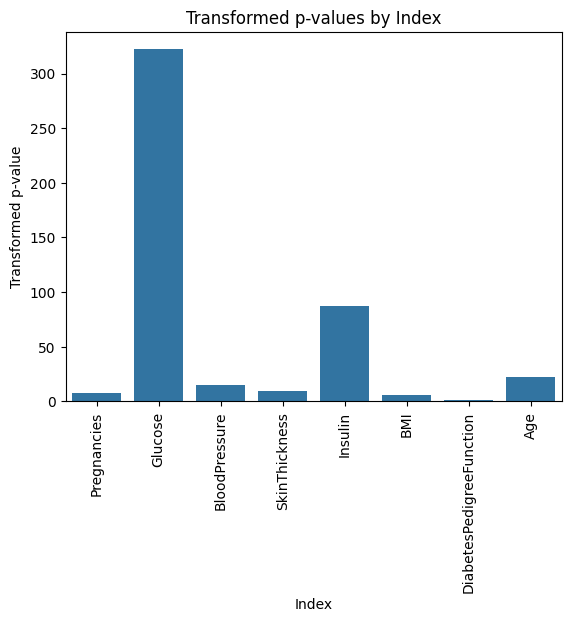

In [141]:
#My own visualization using Seaborn

import seaborn as sns


# Convert lists 'ind' and 'pv' to a DataFrame
df_plot = pd.DataFrame({'ind': ind, 'pv': pv})

# Create a bar plot using Seaborn
sns.barplot(data=df_plot, x='ind', y='pv')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Index')
plt.ylabel('Transformed p-value')
plt.title('Transformed p-values by Index')
plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

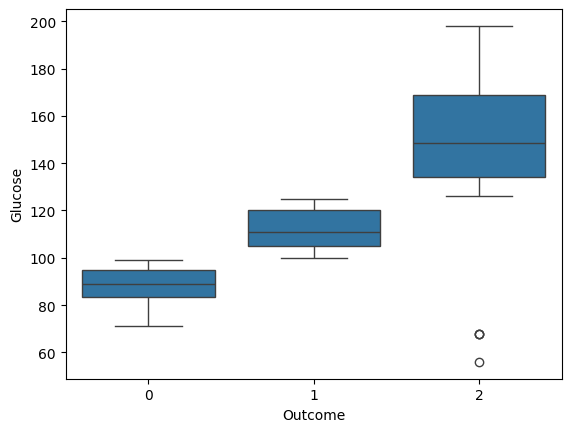

In [142]:
sns.boxplot(y='Glucose', x='Outcome', data=data)

<Axes: xlabel='Glucose', ylabel='Count'>

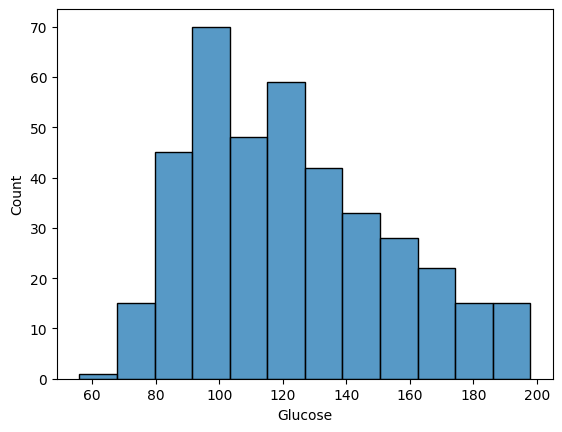

In [143]:
sns.histplot(data['Glucose'])

In [144]:
data['Glucose'].mean()

122.61577608142494

In [145]:
# Save selected features Nonzero data
data = data[['Glucose','BloodPressure','Insulin','Age','Outcome']]
data.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94,21,0
1,137,40,168,33,2
2,78,50,88,26,0
3,197,70,543,53,2
4,189,60,846,59,2


In [146]:
len(data.index)

393

In [147]:
data.isin([0]).sum()

Glucose           0
BloodPressure     0
Insulin           0
Age               0
Outcome          98
dtype: int64

In [148]:
data.to_csv('selfeatures-nonzero.csv', index=False)

##**Preparing Polynomial Data**

In [149]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv,sklearn

from subprocess import check_output

In [150]:
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data = data[data['Glucose'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['Age'] != 0]

In [151]:
#Create Train data for training the Polynomial Regression

#delete zero row entries (using this to avoid )
train = data[['Glucose','Insulin']]
train.reset_index(drop=True, inplace=True)
train.head()

,Glucose,Insulin
0,89,94
1,137,168
2,78,88
3,197,543
4,189,846


In [152]:
#Create Test Data for predictiong missing values
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data = data[data['Glucose'] != 0]
data = data[data['Insulin'] == 0]
data = data[data['BloodPressure'] != 0]
data = data[data['Age'] != 0]

pred = data[['Glucose','Insulin']]
pred.reset_index(drop=True, inplace=True)
pred.head()

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,116,0
4,125,0


In [153]:
#save train data
train.to_csv('poly-Nonzero.csv',index=False, header=True)

#save pred data
pred.to_csv('poly-pred.csv',index=False, header=True)

##**Polynomial Regression**

In [154]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [155]:
#glucose and output data
data = pd.read_csv('poly-Nonzero.csv')
data = data.sort_values(by='Insulin', ascending=True)
print(data.shape)
data.head()

(393, 2)


,Glucose,Insulin
226,180,14
319,68,15
390,88,16
293,99,18
48,83,18


In [156]:
from sklearn.model_selection import train_test_split
splitRatio = 0.2

train , test = train_test_split(data,test_size = splitRatio,random_state = 123)

X_train = train[[x for x in train.columns if x not in ["Insulin"]]]
y_train = train[["Insulin"]]
#y_train = label_binarize(y_train, classes=[0,1,2])

X_test  = test[[x for x in test.columns if x not in ["Insulin"]]]
y_test  = test[["Insulin"]]

In [157]:
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

In [158]:
polynomial_features2= PolynomialFeatures(degree=2)
polynomial_features7= PolynomialFeatures(degree=7)
polynomial_features12= PolynomialFeatures(degree=12)
polynomial_features17= PolynomialFeatures(degree=17)

In [159]:
x_poly2 = polynomial_features2.fit_transform(X_train)
t_poly2 = polynomial_features2.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly2, y_test)
y_poly_pred2 = model.predict(t_poly2)



x_poly7 = polynomial_features7.fit_transform(X_train)
t_poly7 = polynomial_features7.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly7, y_test)
y_poly_pred7 = model.predict(t_poly7)




x_poly12 = polynomial_features12.fit_transform(X_train)
t_poly12 = polynomial_features12.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly12, y_test)
y_poly_pred12 = model.predict(t_poly12)

x_poly17 = polynomial_features17.fit_transform(X_train)
t_poly17 = polynomial_features17.fit_transform(X_test)
model = LinearRegression()
model.fit(t_poly17, y_test)
y_poly_pred17 = model.predict(t_poly17)

In [160]:
mse = mean_squared_error(y_test,y_poly_pred2)
print(mse)

6873.914807633459


In [161]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_poly_pred2)

56.02684694954639

82.90907554443879
0.43911224526388404


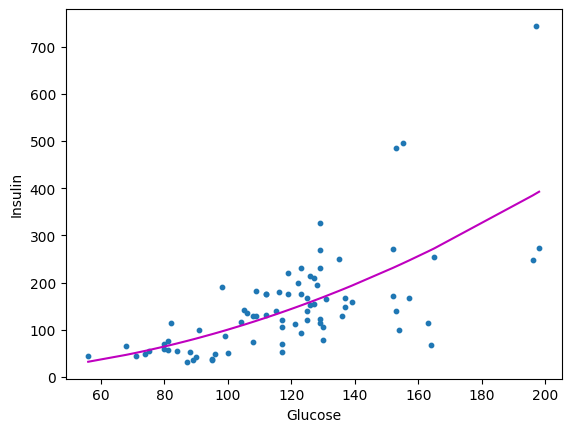

In [162]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred2))
r2 = r2_score(y_test,y_poly_pred2)
print(rmse)
print(r2)

plt.scatter(X_test, y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_poly_pred2), key=sort_axis)
X_test, y_poly_pred2 = zip(*sorted_zip)
plt.plot(X_test, y_poly_pred2, color='m')
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

In [163]:
#new_df = pd.DataFrame([[141,44]])
new_df = pd.read_csv('poly-pred.csv',encoding='latin1')
new_df  = new_df[["Glucose"]]
new_df.head()

,Glucose
0,148
1,85
2,183
3,116
4,125


In [164]:
new_d = new_df.to_numpy()
newdf_poly = polynomial_features7.fit_transform(new_d)

In [165]:
# We predict the outcome
prediction = model.predict(newdf_poly)
prediction = prediction.astype(int)

ValueError: X has 8 features, but LinearRegression is expecting 18 features as input.

In [ ]:
new_df['Insulin'] = prediction
new_df.head()

In [ ]:
new_df.to_csv('pred-insulin-7.csv',index=False, header=True)

##**Prepare Data for Prediction:**

In [166]:
import pandas as pd
import numpy as np

In [171]:
# Read nonzero of selected feature data
df_S = pd.read_csv('diabetes2.csv',encoding='latin1')
df_S = df_S.rename(columns={'Output': 'Outcome'})
df_S = df_S[df_S['Glucose'] != 0]
df_S = df_S[df_S['Insulin'] != 0]
df_S = df_S[df_S['BloodPressure'] != 0]
df_S = df_S[df_S['Age'] != 0]
df_S = df_S[['Glucose','BloodPressure','Insulin','Age','Outcome']]
df_S.reset_index(drop=True, inplace=True)
len(df_S.index)

393

In [172]:
#Retain Zero Insulin dat
df_D = pd.read_csv('diabetes2.csv',encoding='latin1')
df_D = df_D.rename(columns={'Output': 'Outcome'})
df_D = df_D[df_D['Glucose'] != 0]
df_D = df_D[df_D['Insulin'] == 0]
df_D = df_D[df_D['BloodPressure'] != 0]
df_D = df_D[df_D['Age'] != 0]
df_D = df_D[['Glucose','BloodPressure','Insulin','Age','Outcome']]
df_D.reset_index(drop=True, inplace=True)
len(df_D.index)

335

In [173]:
df_P = pd.read_csv('pred-insulin-7.csv')
len(df_P.index)

335

In [174]:
# Replace column Insulin with predicted
df_D['Insulin'] = df_P['Insulin']

KeyError: 'Insulin'

In [175]:
#concatenate predicted insulin values with diabetestest2 data (which is only Glucose and Output)
merge = pd.concat([df_S, df_D])
merge.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,89,66,94,21,0
1,137,40,168,33,2
2,78,50,88,26,0
3,197,70,543,53,2
4,189,60,846,59,2


In [176]:
len(merge.index)

728

In [177]:
merge.isin([0]).sum()

Glucose            0
BloodPressure      0
Insulin          335
Age                0
Outcome          170
dtype: int64